In [1]:
#unzipping dataset folder
!unzip '/content/drive/MyDrive/Bird_Dataset.zip'

Archive:  /content/drive/MyDrive/Bird_Dataset.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: te

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#Data Augmentation
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255)) 

In [4]:
train = train_gen.flow_from_directory('/content/train_data/train_data',target_size=(120, 120),class_mode='categorical', batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data',target_size=(120, 120),class_mode='categorical', batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [5]:
#The different classes and their indexes
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Convolution2D, Flatten, Dense

In [7]:
#CNN structure
model = Sequential()

model.add(Convolution2D(24,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(36,activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(16,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        6944      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0

In [9]:
#compiling all layers
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
#training the model
model.fit(train,batch_size=8,epochs=40,validation_data=test)

Epoch 1/40
19/19 [==============================] - 97s 5s/step - loss: 2.7397 - accuracy: 0.1333 - val_loss: 2.7460 - val_accuracy: 0.1210
Epoch 2/40
19/19 [==============================] - 118s 6s/step - loss: 2.5856 - accuracy: 0.1733 - val_loss: 2.8016 - val_accuracy: 0.1083
Epoch 3/40
19/19 [==============================] - 84s 5s/step - loss: 2.5121 - accuracy: 0.1933 - val_loss: 2.5952 - val_accuracy: 0.1783
Epoch 4/40
19/19 [==============================] - 85s 5s/step - loss: 2.3840 - accuracy: 0.1867 - val_loss: 2.6091 - val_accuracy: 0.1975
Epoch 5/40
19/19 [==============================] - 86s 5s/step - loss: 2.2451 - accuracy: 0.2133 - val_loss: 2.6672 - val_accuracy: 0.2166
Epoch 6/40
19/19 [==============================] - 85s 5s/step - loss: 2.1506 - accuracy: 0.2267 - val_loss: 2.6947 - val_accuracy: 0.1975
Epoch 7/40
19/19 [==============================] - 119s 6s/step - loss: 2.1311 - accuracy: 0.2267 - val_loss: 2.6470 - val_accuracy: 0.1720
Epoch 8/40
19/19 [

In [11]:
model.save('birds.h5')

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image

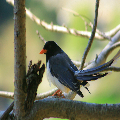

In [32]:
#Testing with class images - Input image = rebimg
img = image.load_img('/content/rebimg.jpg', target_size=(120,120))
img

In [33]:
#Converting the image to array and Changing the dimension of the image 
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)

In [34]:
#Predicting
pred = np.argmax(model.predict(img))
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
output[pred] #Correct output

1/1 [==============================] - 0s 19ms/step


'rebimg'

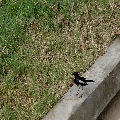

In [55]:
#Input image = mgprob
img1 = image.load_img('/content/mgprob.jpg', target_size=(120,120))
img1

In [56]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)

In [57]:
pred = np.argmax(model.predict(img1))
output[pred] #Correct output

1/1 [==============================] - 0s 19ms/step


'mgprob'

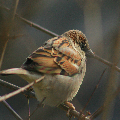

In [58]:
#Input image = hsparo
img2 = image.load_img('/content/hsparo.jpg', target_size=(120,120))
img2

In [59]:
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)

In [60]:
pred = np.argmax(model.predict(img2))
output[pred] #Wrong output

1/1 [==============================] - 0s 21ms/step


'himbul'